In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

In [2]:
#Load data:
prices_day__1 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round2\round-2-island-data-bottle\prices_round_2_day_-1.csv",sep =";")
prices_day_1 =pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round2\round-2-island-data-bottle\prices_round_2_day_1.csv",sep =";")
prices_day_0 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round2\round-2-island-data-bottle\prices_round_2_day_0.csv",sep =";")
prices_day__1["day"] = -1
prices_day_1["day"] = 1
prices_day_0["day"] = 0
prices = pd.concat([prices_day__1, prices_day_1, prices_day_0], axis=0)
prices.sort_values(by=["day","timestamp"],inplace=True)
prices.reset_index(drop=True, inplace=True)


In [3]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,1,999900,JAMS,6519,204,NaN,NaN,NaN,NaN,6521,204,NaN,NaN,NaN,NaN,6520.0,0.0
239996,1,999900,RAINFOREST_RESIN,9992,34,NaN,NaN,NaN,NaN,10008,34,NaN,NaN,NaN,NaN,10000.0,0.0
239997,1,999900,SQUID_INK,1880,20,NaN,NaN,NaN,NaN,1884,20,NaN,NaN,NaN,NaN,1882.0,0.0
239998,1,999900,PICNIC_BASKET1,58713,15,58712.0,21.0,NaN,NaN,58724,15,58725.0,21.0,NaN,NaN,58718.5,0.0


In [4]:
croissants = prices[prices["product"] == "CROISSANTS"]
jams = prices[prices["product"] == "JAMS"]
djembes = prices[prices["product"] == "DJEMBES"]
picnic_basket1 = prices[prices["product"] == "PICNIC_BASKET1"]
picnic_basket2 = prices[prices["product"] == "PICNIC_BASKET2"]

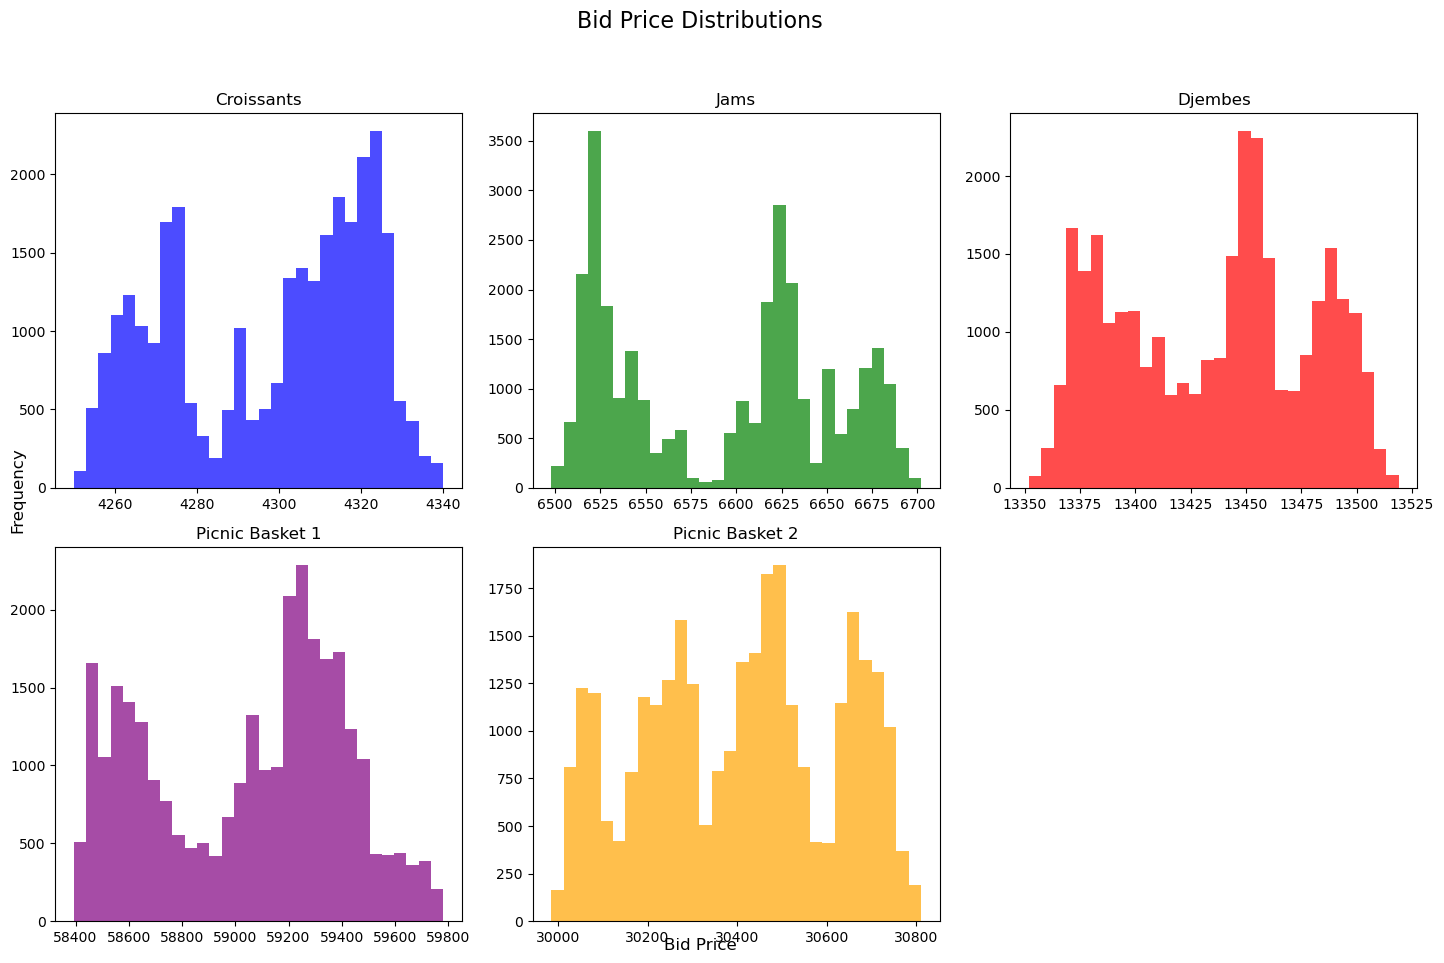

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots

# Plot histograms for each product
axes[0, 0].hist(croissants["bid_price_1"], bins=30, alpha=0.7, color='blue')
axes[0, 0].set_title('Croissants')

axes[0, 1].hist(jams["bid_price_1"], bins=30, alpha=0.7, color='green')
axes[0, 1].set_title('Jams')

axes[0, 2].hist(djembes["bid_price_1"], bins=30, alpha=0.7, color='red')
axes[0, 2].set_title('Djembes')

axes[1, 0].hist(picnic_basket1["bid_price_1"], bins=30, alpha=0.7, color='purple')
axes[1, 0].set_title('Picnic Basket 1')

axes[1, 1].hist(picnic_basket2["bid_price_1"], bins=30, alpha=0.7, color='orange')
axes[1, 1].set_title('Picnic Basket 2')

# Hide the last subplot (bottom-right) if not used
axes[1, 2].axis('off')

# Add common labels
fig.suptitle('Bid Price Distributions', fontsize=16)
fig.text(0.5, 0.04, 'Bid Price', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])  # Adjust layout to fit titles and labels
plt.show()

In [6]:
croissants = prices[prices["product"] == "CROISSANTS"]
jams = prices[prices["product"] == "JAMS"]
djembes = prices[prices["product"] == "DJEMBES"]
picnic_basket1 = prices[prices["product"] == "PICNIC_BASKET1"]
picnic_basket2 = prices[prices["product"] == "PICNIC_BASKET2"]

# Align by day and timestamp
aligned_data = pd.merge(
    croissants[["day", "timestamp", "bid_price_1"]],
    jams[["day", "timestamp", "bid_price_1"]],
    on=["day", "timestamp"],
    suffixes=("_croissants", "_jams")
)

# Rename the bid_price_1 column for djembes to avoid suffix conflicts
djembes = djembes.rename(columns={"bid_price_1": "bid_price_1_djembes"})

aligned_data = pd.merge(
    aligned_data,
    djembes[["day", "timestamp", "bid_price_1_djembes"]],
    on=["day", "timestamp"],
    how="left"
)
aligned_data["synthetic_basket_1"] = (
    6 * aligned_data["bid_price_1_croissants"] +
    3 * aligned_data["bid_price_1_jams"] +
    1 * aligned_data["bid_price_1_djembes"]
)

aligned_data["synthetic_basket_2"] = (
    4 * aligned_data["bid_price_1_croissants"] +
    2 * aligned_data["bid_price_1_jams"]
)
# Merge PICNIC_BASKET1 prices as "real_basket_1"
aligned_data = pd.merge(
    aligned_data,
    picnic_basket1[["day", "timestamp", "bid_price_1"]].rename(columns={"bid_price_1": "real_basket_1"}),
    on=["day", "timestamp"],
    how="left"
)

# Merge PICNIC_BASKET2 prices as "real_basket_2"
aligned_data = pd.merge(
    aligned_data,
    picnic_basket2[["day", "timestamp", "bid_price_1"]].rename(columns={"bid_price_1": "real_basket_2"}),
    on=["day", "timestamp"],
    how="left"
)

In [7]:
aligned_data["arb_basket1"] = aligned_data["real_basket_1"] - aligned_data["synthetic_basket_1"]
aligned_data["arb_basket2"] = aligned_data["real_basket_2"] - aligned_data["synthetic_basket_2"]
aligned_data["arb_basket_baskets"] = aligned_data["real_basket_1"] - (aligned_data["real_basket_2"] + 2*aligned_data["bid_price_1_croissants"]+aligned_data["bid_price_1_jams"]+aligned_data["bid_price_1_djembes"])

In [8]:
X_components = aligned_data[["bid_price_1_croissants", "bid_price_1_jams", "bid_price_1_djembes"]]
y_basket1 = aligned_data["real_basket_1"]
y_basket2 = aligned_data["real_basket_2"]

In [9]:
# Fit regression for Basket 1 with no intercept
model_basket1_components = LinearRegression(fit_intercept=False)
model_basket1_components.fit(X_components, y_basket1)
coefficients_basket1_components = model_basket1_components.coef_

# Fit regression for Basket 2 with no intercept
model_basket2_components = LinearRegression(fit_intercept=False)
model_basket2_components.fit(X_components, y_basket2)
coefficients_basket2_components = model_basket2_components.coef_

# Print results
print("Basket 1 Regression Coefficients (Components, No Intercept):", coefficients_basket1_components)
print("Basket 2 Regression Coefficients (Components, No Intercept):", coefficients_basket2_components)


Basket 1 Regression Coefficients (Components, No Intercept): [8.49318614 2.66122078 0.37259003]
Basket 2 Regression Coefficients (Components, No Intercept): [ 4.1366589   2.2213497  -0.14996876]


In [10]:
aligned_data["predicted_basket1"] = model_basket1_components.predict(X_components)
aligned_data["predicted_basket2"] = model_basket2_components.predict(X_components)

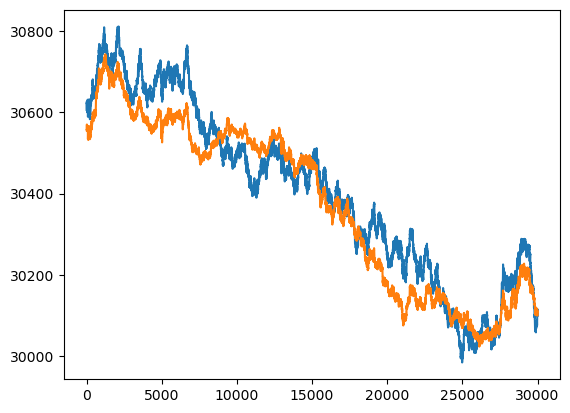

In [14]:
plt.plot(aligned_data["real_basket_2"])
plt.plot(aligned_data["synthetic_basket_2"])

In [11]:
aligned_data["arb_coefficients_1"] = aligned_data["real_basket_1"]- aligned_data["predicted_basket1"]
aligned_data["arb_coefficients_2"] = aligned_data["real_basket_2"]- aligned_data["predicted_basket2"]
 

In [23]:
# Plot the data
fig = go.Figure()

# Arbitrage Basket 1
fig.add_trace(go.Scatter(
    y=aligned_data["arb_basket1"],
    mode='lines',
    name="Arbitrage Basket 1",
    line=dict(color='blue')
))
# Arbitrage Basket 2
fig.add_trace(go.Scatter(
    y=aligned_data["arb_basket2"],
    mode='lines',
    name="Arbitrage Basket 2",
    line=dict(color='orange')
))


# Arbitrage between Baskets
fig.add_trace(go.Scatter(
    y=aligned_data["arb_basket_baskets"],
    mode='lines',
    name="Arbitrage between Baskets",
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    y=aligned_data["arb_coefficients_1"],
    mode='lines',
    name="Arbitrage Coefficients 1",
    line=dict(color='purple')
))

fig.add_trace(go.Scatter(
    y=aligned_data["arb_coefficients_2"],
    mode='lines',
    name="Arbitrage Coefficients 2",
    line=dict(color='red')
))

fig.update_layout(
    title="Arbitrage Opportunitiess",
    xaxis_title="Timestamp",
    yaxis_title="Arbitrage Value",
    legend_title="Legend"
)


fig.show()